In [1]:
import numpy as np

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import check_lab06 as p

import pretty_plots # script to set up LaTex and increase line-width and font size

In [2]:
pretty_plots.setdefaults()
pi=np.pi

/home/ryan/Documents/UConn/ME3263/me3263_F2019/experiment_06/ME3263-Lab_06/pretty_plots.py:6: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  plt.rcParams['text.latex.unicode'] = True


# ME 3263 Introduction to Sensors and Data Analysis

# Lab \#6 Temperature Measurements in a First Order Thermal System 

## Temperature Sensing

Temperature is one of the most common measurements in engineering
applications. The metrological definition of temperature depends upon 14 phase transitions in different materials and five different temperature measurement devices [\[1\]](./ITS_1990-Preston-Thomas_Metrologia.pdf). Thermocouples are a common method to measure temperature in engineering systems [\[2\]](./E220-thermocouples.pdf). Thermocouples use the Seebeck effect to produce a voltage in a conductor. Two wires
such as iron and constantan, shown in Figure 1, are used to create an electromotive force proportional to the temperature gradient from the hot end to the cold
end (cold junction) of the wires. Knowing the temperature
at the cold junction allows you to find the temperature at the
measurement site.

![Figure 1: A schematic of a thermocouple with cold temperature
compensation. The second image shows the scale of a thermocouple,
relative to a penny.](./figure_01.png)

**Figure 1: A schematic of a thermocouple with cold temperature
compensation. The second image shows the scale of a thermocouple,
relative to a penny.**

In this lab we will measure the temperature of water after a hot mass has been introduced. The lab set-up is shown
schematically in Figure 2. The temperature of the water due to convection from a hot point mass results in the first order differential equation as such

$\frac{dT_{f}}{dt}+\lambda T_{f} = F$ (1)

where $T_f$ is the  fluid temperature and $\lambda$ and $F$ are constants based upon physical properties of
the system and initial internal energy. We can solve for the solution of $T_f(t)$ with inital conditions of the system. The solution to a first order differential equation is shown as the following python function, a representative curve is shown for an intial temperature of 0 rising to a final temperature of 1. The solution is an exponential decay with time constant, $\tau$. The solution approaches the final temperature, after $\tau$ steps, T=0.63, after $3\tau$, T=0.95, after $6\tau$, T=0.99. 

In [3]:
def T_order1(L,F,T0):
    '''solution to first order system dT/dt+L*T=F, 
    where L and F are based upon physical constants 
    and T0 is the initial condition at time=0.'''
    A=T0-F/L
    T=A*np.exp(-L*t)+F/L
    return T

Text(0, 0.5, '$T$')

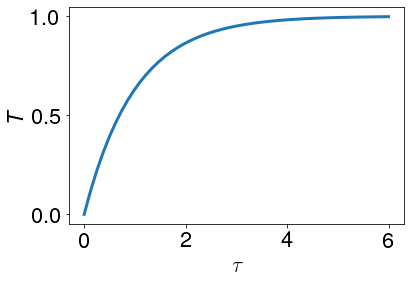

In [4]:
t=np.linspace(0,6)
T_fluid=T_order1(1,1,0)
plt.plot(t,T_fluid)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$T$')

![Figure 2: A schematic of the experimental system.](./figure_02.png)

**Figure 2: A schematic of the experimental system.**

For an adiabatic system, any increase in temperature of the water is due to a decrease in temperature from the point mass. We can relate the two temperatures based upon the initial conditions of the system as such

$U_{solid}(0)+U_{water}(0)=U_{solid}(t)+U_{water}(t)$ (2a)

$m_{solid} C_{solid} T_{solid}(0) + m_{water} C_{water} T_{water}(0)=
m_{solid} C_{solid} T_{solid}(t) + m_{water} C_{water} T_{water}(t)$ (2b)

$-\frac{dU_{solid}}{dt}=\frac{dU_{water}}{dt}$ (2c)

$-m_{solid} C_{solid}\frac{dT_{solid}}{dt}=m_{water} C_{water}\frac{dT_{water}}{dt}$ (2d)

where $U$ is the internal energy, $m_{solid}$ and $m_{water}$ are the masses of the solid and water, respectively, $C$ is the specific heat, $T(0)$ are the initial temperatures, and $T(t)$ are the temperatures at any point in time. The rate of energy transferred is governed by natural convection. The rate of energy transferred from the solid to the water, $\dot{Q}$, is as such

$\dot{Q}=h A(T_{water}-T_{solid})$ (3)

where $h$ is the convective heat transfer coefficient and $A$ is the surface area of the solid in contact with the water. Plugging the conservation of energy equations in 2b and 2d into the heat transfer equation in 4 there results

$\frac{T_{water}}{dt}+\left(\frac{hA}{m_{solid}C_{solid}}+\frac{hA}{m_{water}C_{water}}\right)T_{water}
=hA\left(\frac{T_{solid}(0)}{m_{water}C_{water}}+\frac{T_{water}(0)}{m_{solid}C_{solid}}\right)$. (4)

In the following example, 2 kg of water at 20$^o$C has an aluminum cylinder (diameter=25 cm, height=25 cm) mass initially at 90$^{o}$C dropped into it. The specific heat of water is taken as 4186 J/kg-K, the specific heat of aluminum is taken as 900 J/kg-K, and the surface area is solved as the surface area of the cylinder. 

In [5]:
def fluid_temp(t,h,mf,Cf,ms,Cs,As,T0f,T0s):
    '''solution of first order thermal system fluid temperature
    inputs are time, t
    convection coefficient, h 
    mass of fluid, mf
    specific heat of fluid, Cf
    mass of solid, ms
    specific heat of solid, Cs
    area of contact between solid-fluid
    initial fluid temperature, T0f
    initial solid temperature, T0s'''
    #L=h*As*(1/mf/Cf+1/ms/Cs)
    L=h*As*(mf*Cf+ms*Cs)/(ms*mf*Cs*Cf)
    F=h*As*T0s/mf/Cf+h*As*T0f/ms/Cs
    A=T0f-F/L
    Tf=A*np.exp(-L*t)+F/L
    Ts=T0s+mf*Cf/ms/Cs*(T0f-Tf)
    return Tf,Ts

Text(0.5, 1.0, 'Water temperature rise due to 90$^{o}$C Al mass')

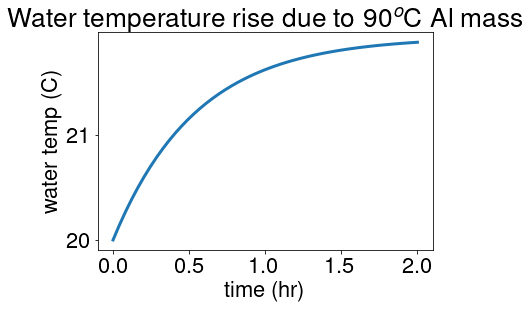

In [6]:
r=0.025
t=0.050
V=pi*r**2*t
ms=2700*V
As=2*pi*r*(r+t)

t=np.linspace(0,2*3600)
Tf,Ts=fluid_temp(t,10,2,4186,ms,900,As,20,90)
plt.plot(t/3600,Tf)
plt.xlabel('time (hr)')
plt.ylabel('water temp (C)')
plt.title(r'Water temperature rise due to 90$^{o}$C Al mass')

# Problem 1

Use the following experimental data to determine the convection coefficient $h$ by fitting the data to the `fluid_temp` function.

0.5 kg of water at 20$^o$C has an aluminum cylinder (diameter=25 cm, height=25 cm) mass initially at has an unknown initial temperature. The specific heat of water is taken as 4186 J/kg-K, the specific heat of aluminum is taken as 900 J/kg-K, and the surface area is solved as the surface area of the cylinder. 

find the convection coefficient $h$ and intitial temperature of the solid, T0s.

|time (s) | Temp (C) |
|---| ---|
| 0.0 | 20.0 |
| 400.0 | 22.30 |
| 800.0 | 23.96 |
| 1200.0 | 25.14 |
| 1600.0 | 26.00 |
| 2000.0 | 26.61 |
| 2400.0 | 27.06 |
| 2800.0 | 27.37 |
| 3200.0 | 27.60 |
| 3600.0 | 27.77 |

In [7]:
# setting up problem 1
t=np.array([0,400,800,1200,1600,2000,2400,2800,3200,3600])
Tf=np.array([20,22.19,24.14,25.08,26.02,26.42,26.99,27.52,27.59,27.78])
def func_01(t,h,T0s):
    r=0.025
    w=0.050
    V=pi*r**2*w
    ms=2700*V
    As=2*pi*r*(r+w)
    mf=0.5
    Cf=4186
    Cs=900
    T0f=19.98
    #fluid_temp(t,15,0.5,4186,ms,900,As,20,100)
    Tf,Ts=fluid_temp(t,h,mf,Cf,ms,Cs,As,T0f,T0s)
    return Tf

In [ ]:
# Use the curve fit function to get h and T0s
# replace the values of f, xdata, ydata, and bestguesses
#popt,pcov =curve_fit(f, xdata, ydata, p0=[bestguessh,bestguessT0s])

plt.plot(t,Tf,'o')
plt.plot(t,func_01(t,popt[0],popt[1]))

p.check_p01(func_01(t,popt[0]+0.1,popt[1]+0.1))

# Experimental details

The time response of the system is characterized by the time constant $\tau=1/\lambda$;
it is the natural time scale for this problem. 
Use a first order thermal system model to measure the time constant, $\tau$, and convection coefficient, $h$, based upon the 
measured temperature vs time. 

-   Calibrate the thermocouple with two phase transitions.
    Plunge your thermocouple into an ice bath and then boiled water.
    
-   Weigh your styrofoam box on the scale. Fill your styrofoam box with
    cool tap water. Weigh the box + water. Record the mass of water and
    measure the initial water temperature (via the thermocouple).

-   Drop the heated mass that has been heated up to a preset temperature into
    the water.

-   **Record the temperature of the water as a function of time.** Be
    sure to choose an appropriate sample rate.

-   Record the
    mass, the material composition of the mass (e.g. aluminum, copper, etc.), and
    any necessary geometric features of the mass.

-   From your data, determine the time constant, $\tau$, and the convection coefficient, $h$.

# Determine Temperature of cooling mass

In the lumped heat transfer model derived in equation 4, we made the assumption that our mass is a uniform temperature. This is a valid assumption if conduction within the solid is much faster than convection between the solid and liquid. A common quantity used to verify this assumption is the Biot number [\[3 (p.30)\]](https://ocw.mit.edu/courses/aeronautics-and-astronautics/16-050-thermal-energy-fall-2002/lecture-notes/10_part3.pdf)

$Bi = \frac{hL}{k}$ (5)

where $h$ is the convection coefficent, $L$ is the representative length (often calculated as volume/area), and $k$ is the conduction of the solid. When Bi<<1, conduction happens much faster than convection. When Bi>>1, conduction will dominate heat transfer. 



Use Ansys \[[4](https://ansyshelp.ansys.com/account/secured?returnurl=/Views/Secured/corp/main_page.html), [5](https://kaltura.uconn.edu/media/ansys-transient_heat-transfer+-+Quiz/1_nf1xqyh5)\] to determine the temperature within the solid when it is placed in the cold water. Here, we will enter the temperature of the water based upon experimental results to account for changing $T_{\infty}$ as seen in Figure 3. Model the solid as an axisymmetric cylinder. If your solid is rectangular, make sure the volume and surface area are the same as the experiment. The outer surfaces have convection boundary conditions and the solid initially has a temperature of your measured initial temperature. Use the the best-fit function for the temperature vs time to get 6-10 temperature values to enter into an Ansys transient heat transfer model. 

**Post-process**:
Compare the maximum and minimum temperatures in the solid over time. Compare the conduction-convection model to the lumped-mass prediction of the temperature of the mass.

![Schematic of two dimensional heat transfer model.](./figure_03.png)

**Figure 3: Schematic of two dimensional heat transfer model.**

time,Temp (C)
0,20.0
1440,21.0
2880,21.5
4320,21.7
5760,21.8
7200,21.9


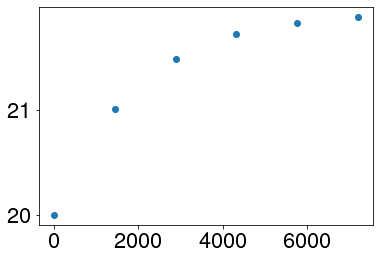

In [8]:
#Experimentally determined convection coefficient, h
# and initial temperature of solid T0s
#Use as input for Ansys model
h=10 # W/m/m/K
T0s=90 # deg C

r=0.025
t=0.050
V=pi*r**2*t
ms=2700*V
As=2*pi*r*(r+t)

tmod=np.linspace(0,2*3600,6)
Tf,Ts=fluid_temp(tmod,h,2,4186,ms,900,As,20,T0s)

plt.plot(tmod,Tf,'o')
print('time,Temp (C)')
for i,T in enumerate(Tf):
    print('%1.0f,%1.1f'%(tmod[i],T))

# References
1. [Preston-Thomas, H. (1990). The international temperature scale of 1990 (ITS-90). metrologia, 27(1), 3.](./ITS_1990-Preston-Thomas_Metrologia.pdf). 

2. [ASTM E220-13 Standard Test Method for Calibration of Thermocouples By Comparison Techniques, ASTM International, West Conshohocken, PA, 2013, https://doi.org/10.1520/E0220-13](./E220-thermocouples.pdf).

3. [MIT Thermal Energy lecture notes (p.30)](https://ocw.mit.edu/courses/aeronautics-and-astronautics/16-050-thermal-energy-fall-2002/lecture-notes/10_part3.pdf)

4. [Ansys help documentation.](https://ansyshelp.ansys.com/account/secured?returnurl=/Views/Secured/corp/main_page.html)

5. [Ansys transient thermal analysis tutorial](https://kaltura.uconn.edu/media/ansys-transient_heat-transfer+-+Quiz/1_nf1xqyh5)